In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def replace_nan_in_nc(input_file, output_file, nan_value=-9999, fill_value=0):
    # Open the NetCDF file using xarray with the netcdf4 engine
    ds = xr.open_dataset(input_file, engine='netcdf4')
    
    # Replace NaN values represented by nan_value with fill_value
    ds = ds.where(ds != nan_value, fill_value)
    
    # Save the modified dataset to a new NetCDF file
    ds.to_netcdf(output_file, engine='netcdf4')

# Example usage
input_file = 'chirps20GlobalDailyP05_6f91_6d79_74bf.nc'
output_file = 'output_rainfall_clipped_1.nc'
replace_nan_in_nc(input_file, output_file, nan_value=-9999, fill_value=0)

In [5]:
# Replace 'path_to_your_file.nc' with the actual path to your NetCDF file
path_to_file = 'output_rainfall_clipped_1.nc'

# Open the NetCDF file as an xarray dataset
ds = xr.open_dataset(path_to_file)

# Now you can work with the xarray dataset 'ds'
ds

<xarray.Dataset>
Dimensions:    (time: 366, latitude: 65, longitude: 74)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2011-01-01
  * latitude   (latitude) float32 8.975 9.025 9.075 9.125 ... 12.07 12.12 12.17
  * longitude  (longitude) float32 36.62 36.68 36.72 36.77 ... 40.18 40.22 40.27
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/31)
    acknowledgements:          The Climate Hazards Group InfraRed Precipitati...
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             pete@geog.ucsb.edu
    creator_name:              Pete Peterson
    creator_type:              person
    ...                        ...
    summary:                   This dataset has 1-day (daily) averages of the...
    time_coverage_end:         2011-01-01T00:00:00Z
    time_coverage_start:       2010-01-01T00:00:00Z
    title:                     CHIRPS Version 2.0, Precipitation, Global, 0.0...
    version:                   2.0
    Westernmost_Easting:       36.625

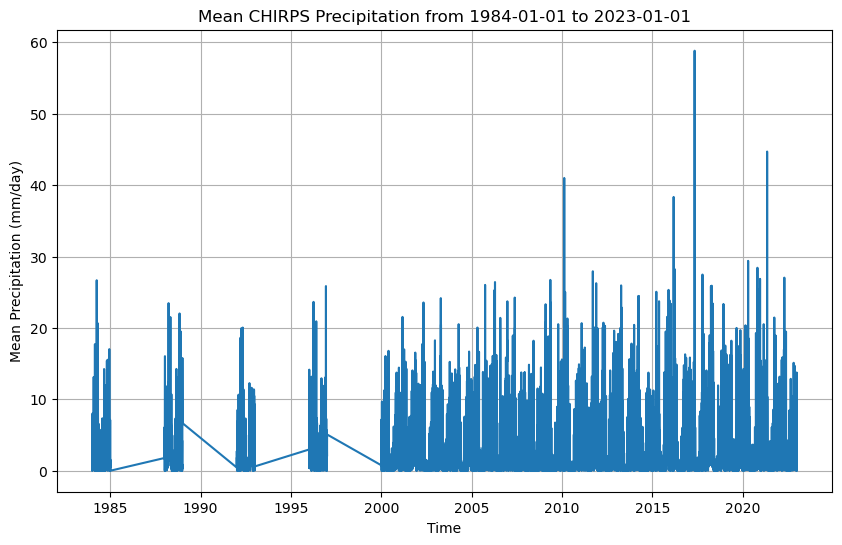

In [3]:
# Load CHIRPS data into an xarray dataset (replace 'path_to_your_chirps_file.nc' with your file path)
ds = xr.open_dataset('chirps20GlobalDailyP05_192c_8f4b_5530.nc')

# Specify the time range you want to plot (replace 'start_date' and 'end_date' with your desired dates)
start_date = '1984-01-01'
end_date = '2023-01-01'

# Select data within the specified time range
data_for_range = ds.sel(time=slice(start_date, end_date))

# Calculate the mean precipitation across all latitudes and longitudes
mean_precipitation = data_for_range['precip'].mean(dim=('latitude', 'longitude'))

# Extract the time dimension
time_data = data_for_range['time']

# Plot mean precipitation against time using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(time_data, mean_precipitation)
plt.title(f'Mean CHIRPS Precipitation from {start_date} to {end_date}')
plt.xlabel('Time')
plt.ylabel('Mean Precipitation (mm/day)')
plt.grid(True)
plt.show()

In [3]:
# Replace 'path_to_your_file.nc' with the actual path to your NetCDF file
path_to_file = 'UA_SWE_Depth_WY1986.nc'

# Open the NetCDF file as an xarray dataset
ds = xr.open_dataset(path_to_file)

# Now you can work with the xarray dataset 'ds'
ds

<xarray.Dataset>
Dimensions:   (lat: 621, lon: 1405, time: 365, time_str_len: 11)
Coordinates:
  * lat       (lat) float32 24.08 24.12 24.17 24.21 ... 49.79 49.83 49.88 49.92
  * lon       (lon) float32 -125.0 -125.0 -124.9 -124.9 ... -66.58 -66.54 -66.5
  * time      (time) datetime64[ns] 1985-10-01 1985-10-02 ... 1986-09-30
Dimensions without coordinates: time_str_len
Data variables:
    crs       |S1 ...
    time_str  (time_str_len, time) |S1 ...
    SWE       (time, lat, lon) float32 ...
    DEPTH     (time, lat, lon) float32 ...

In [7]:
# Replace 'path_to_your_file.nc' with the actual path to your NetCDF file
path_to_file = 'chirps-v2.0.1981.days_p05.nc'

# Open the NetCDF file as an xarray dataset
ds = xr.open_dataset(path_to_file)

# Now you can work with the xarray dataset 'ds'
ds

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 365)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 1981-12-31
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [10]:
# Create a mock dataset for demonstration
times = pd.date_range("1981-01-01", periods=15826, freq="D")
latitudes = [9.225 + i * 0.05 for i in range(55)]
longitudes = [37.27 + i * 0.05 for i in range(51)]
ds = xr.Dataset(
    {
        "precip": (("time", "latitude", "longitude"), np.random.rand(15826, 55, 51))
    },
    coords={
        "time": times,
        "latitude": latitudes,
        "longitude": longitudes
    }
)

# Original time coordinate
print("Original time coordinate:")
print(ds["time"])

# Convert the datetime64 coordinate to string with the desired format
formatted_time = pd.to_datetime(ds["time"].values).strftime('%Y-%m-%d')

# Update the time coordinate in the dataset
ds = ds.assign_coords(time=pd.to_datetime(formatted_time))

# Verify the conversion
print("Formatted time coordinate:")
print(ds["time"])


Original time coordinate:
<xarray.DataArray 'time' (time: 15826)>
array(['1981-01-01T00:00:00.000000000', '1981-01-02T00:00:00.000000000',
       '1981-01-03T00:00:00.000000000', ..., '2024-04-28T00:00:00.000000000',
       '2024-04-29T00:00:00.000000000', '2024-04-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2024-04-30
Formatted time coordinate:
<xarray.DataArray 'time' (time: 15826)>
array(['1981-01-01T00:00:00.000000000', '1981-01-02T00:00:00.000000000',
       '1981-01-03T00:00:00.000000000', ..., '2024-04-28T00:00:00.000000000',
       '2024-04-29T00:00:00.000000000', '2024-04-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2024-04-30


In [11]:
ds

<xarray.Dataset>
Dimensions:    (time: 15826, latitude: 55, longitude: 51)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2024-04-30
  * latitude   (latitude) float64 9.225 9.275 9.325 9.375 ... 11.82 11.88 11.93
  * longitude  (longitude) float64 37.27 37.32 37.37 37.42 ... 39.67 39.72 39.77
Data variables:
    precip     (time, latitude, longitude) float64 0.7198 0.5636 ... 0.3381

In [10]:
# Load CHIRPS data into an xarray dataset (replace 'path_to_your_chirps_file.nc' with your file path)
ds = xr.open_dataset('chirps-v2.0.1981.days_p05.nc')

# Specify the time range you want to plot (replace 'start_date' and 'end_date' with your desired dates)
start_date = '1981-01-01'
end_date = '1982-01-01'

# Select data within the specified time range
data_for_range = ds.sel(time=slice(start_date, end_date))

# Calculate the mean precipitation over time for each latitude and longitude
mean_precipitation_spatial = data_for_range['precip'].sum(dim='time')

# Get the latitude and longitude data
latitudes = mean_precipitation_spatial['latitude']
longitudes = mean_precipitation_spatial['longitude']

# Plotting the mean precipitation as a raster plot
plt.figure(figsize=(12, 8))
plt.pcolormesh(longitudes, latitudes, mean_precipitation_spatial, shading='auto', cmap='viridis')
plt.colorbar(label='Mean Precipitation (mm/day)')
plt.title(f'Mean CHIRPS Precipitation from {start_date} to {end_date}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

MemoryError: Unable to allocate 19.6 GiB for an array with shape (365, 2000, 7200) and data type float32

In [4]:
ds

<xarray.Dataset>
Dimensions:    (time: 366, latitude: 65, longitude: 74)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2011-01-01
  * latitude   (latitude) float32 8.975 9.025 9.075 9.125 ... 12.07 12.12 12.17
  * longitude  (longitude) float32 36.62 36.68 36.72 36.77 ... 40.18 40.22 40.27
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/31)
    acknowledgements:          The Climate Hazards Group InfraRed Precipitati...
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             pete@geog.ucsb.edu
    creator_name:              Pete Peterson
    creator_type:              person
    ...                        ...
    summary:                   This dataset has 1-day (daily) averages of the...
    time_coverage_end:         2011-01-01T00:00:00Z
    time_coverage_start:       2010-01-01T00:00:00Z
    title:                     CHIRPS Version 2.0, Precipitation, Global, 0.0...
    version:                   2.0
    Westernmost_Easting:       36.625

In [18]:
import geopandas as gpd
import rioxarray
import xarray as xr

# Load the shapefile
shapefile_path = r'C:\Users\gaurav.fouzdar\Desktop\New folder\LV_Kagera_Akanyaru.shp'
gdf = gpd.read_file(shapefile_path)

# Load the NetCDF file with chunking
netcdf_path = r'C:\Users\gaurav.fouzdar\chirps-v2.0.1981.days_p05.nc'
ds = xr.open_dataset(netcdf_path, chunks={'time': 1})

# Manually set the CRS for the NetCDF dataset
ds = ds.rio.write_crs("EPSG:4326")  # Replace with the correct CRS if known

# Ensure the CRS of the rainfall data and the shapefile are the same
if gdf.crs != ds.rio.crs:
    gdf = gdf.to_crs(ds.rio.crs)

# Extract individual geometries from the GeoDataFrame
geometries = gdf.geometry

# Clip the rainfall data using the geometries
clipped_rainfall = ds.rio.clip(geometries, ds.rio.crs)

# Save the clipped data to a new NetCDF file
clipped_netcdf_path = r'C:\Users\gaurav.fouzdar\clipped_rainfall.nc'
clipped_rainfall.to_netcdf(clipped_netcdf_path)

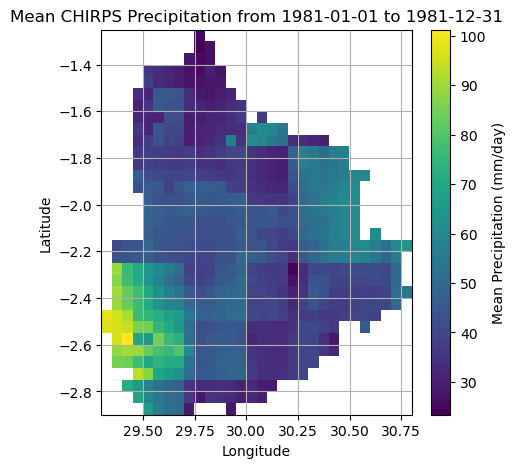

In [19]:
# Load CHIRPS data into an xarray dataset (replace 'path_to_your_chirps_file.nc' with your file path)
ds = xr.open_dataset('clipped_rainfall.nc')

# Specify the time range you want to plot (replace 'start_date' and 'end_date' with your desired dates)
start_date = '1981-01-01'
end_date = '1981-12-31'

# Select data within the specified time range
data_for_range = ds.sel(time=slice(start_date, end_date))

# Calculate the mean precipitation over time for each latitude and longitude
mean_precipitation_spatial = data_for_range['precip'].max(dim='time')

# Get the latitude and longitude data
latitudes = mean_precipitation_spatial['latitude']
longitudes = mean_precipitation_spatial['longitude']

# Plotting the mean precipitation as a raster plot
plt.figure(figsize=(5, 5))
plt.pcolormesh(longitudes, latitudes, mean_precipitation_spatial, shading='auto', cmap='viridis')
plt.colorbar(label='Mean Precipitation (mm/day)')
plt.title(f'Mean CHIRPS Precipitation from {start_date} to {end_date}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [9]:
import netCDF4 as nc
import xarray as xr

# Load the NetCDF file
file_path = 'clipped_rainfall.nc'
dataset = xr.open_dataset(file_path)

# Inspect the structure
print(dataset)

# Check variables and dimensions
print(dataset.variables)
print(dataset.dims)

# Ensure units and metadata are correct
print(dataset['precip'].attrs)

# Modify units if needed
dataset['precip'].attrs['units'] = 'mm/day'

# Save changes back to NetCDF
dataset.to_netcdf('modified_chirps_data.nc')

<xarray.Dataset>
Dimensions:      (time: 366, latitude: 55, longitude: 51)
Coordinates:
  * time         (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2011-01-01
  * latitude     (latitude) float32 9.225 9.275 9.325 ... 11.82 11.87 11.92
  * longitude    (longitude) float32 37.27 37.32 37.38 ... 39.68 39.72 39.77
Data variables:
    spatial_ref  int32 ...
    precip       (time, latitude, longitude) float32 ...
Frozen({'time': <xarray.IndexVariable 'time' (time: 366)>
array(['2010-01-01T00:00:00.000000000', '2010-01-02T00:00:00.000000000',
       '2010-01-03T00:00:00.000000000', ..., '2010-12-30T00:00:00.000000000',
       '2010-12-31T00:00:00.000000000', '2011-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    _CoordinateAxisType:  Time
    actual_range:         [1.262304e+09 1.293840e+09]
    axis:                 T
    comment:              This is the time at the start of the day.
    ioos_category:        Time
    long_name:            Time
    standard_na